### Import libraries

In [10]:
import pandas as pd
import os

#### Fetch all CSVs

In [14]:
files = [file for file in os.listdir('./Sales_Data')]

df = pd.DataFrame()

for file in files:
    temp_df = pd.read_csv(f'./Sales_Data/{file}')
    df = pd.concat([df, temp_df])

df.to_csv("all_merged_data.csv", index=False)

#### Read merged dataset

In [230]:
all_data = pd.read_csv("all_merged_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean Dataset

#### Remove rows with NaN

In [231]:
nan_df = all_data[all_data.isna().any(axis=1)]

In [243]:
all_data = all_data.dropna(how="all")

#### Remove rows with wrong values

In [244]:
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']

## Add Columns

#### Add month

In [234]:
## Add Month Column
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
## Alternate Method to add Month column
# all_data["Month_2"] = pd.to_datetime(all_data["Order Date"]).dt.month


## Add Sales Column
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
## Alternate method
# all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')


## Add City Column
def get_city(address):
    address_split = address.split(",")
    return f'{address_split[1].strip(" ")} ({address_split[2].strip(" ").split(" ")[0]})'
    
all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x))
all_data.head()


## Add Hour Column
all_data["Hour"] = pd.to_datetime(all_data["Order Date"]).dt.hour
all_data["Count"] = 1


all_data.head()

C:\Users\Abhinav Gupta\AppData\Local\Temp\ipykernel_748\1107488707.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data["Hour"] = pd.to_datetime(all_data["Order Date"]).dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,1


# Question 1: Which month has highest number of sales?

In [235]:
month_wise_df = all_data.groupby(["Month"]).sum(["Sales"])
# month_wise_df

In [236]:
import matplotlib.pyplot as plt
# plt.bar(range(1,13), month_wise_df["Sales"])
# plt.xticks(range(1,13))
# plt.ylabel('Sales in Million USD ($)')
# plt.xlabel('Month number')
# plt.show()

# Question 2: Which City has highest number of sales?

In [237]:
city_sale_df = all_data.groupby(["City"]).sum(["Sales"])
# city_sale_df["Sales"]

In [238]:
import matplotlib.pyplot as plt

cities = [city[0] for city, df in all_data.groupby(['City'])]

# plt.bar(cities, city_sale_df['Sales'])
# plt.ylabel('Sales in Million USD ($)')
# plt.xlabel('City Name')
# plt.xticks(cities, rotation='vertical', size=8)
# plt.show()

# Question 3: At what time should we advertise?

In [239]:
keys = [pair[0] for pair, df in all_data.groupby(['Hour'])]
count_df = all_data.groupby(['Hour']).count()['Count']

# plt.plot(keys, count_df)
# plt.xticks(keys)
# plt.grid()
# plt.show()

## Morning around -> 11 am to 1 noon
## Evening arounf -> 6.30 pm to 7.30 pm

# Question 4: What products are purchased together?

In [240]:
# Create group based on order_id.
df = all_data[all_data["Order ID"].duplicated(keep=False)]
df["Grouped"] = df.groupby(["Order ID"])["Product"].transform(lambda x: ", ".join(x))
df2 = df[["Order ID", "Grouped"]].drop_duplicates()
df2.head()

C:\Users\Abhinav Gupta\AppData\Local\Temp\ipykernel_748\710627240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Grouped"] = df.groupby(["Order ID"])["Product"].transform(lambda x: ", ".join(x))


,Order ID,Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [241]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2["Grouped"]:
    items = row.split(", ")
    count.update(Counter(combinations(items, 2)))

for key, val in count.most_common(10):
    print(key, val)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Question 5: Which product sold the most? and why?

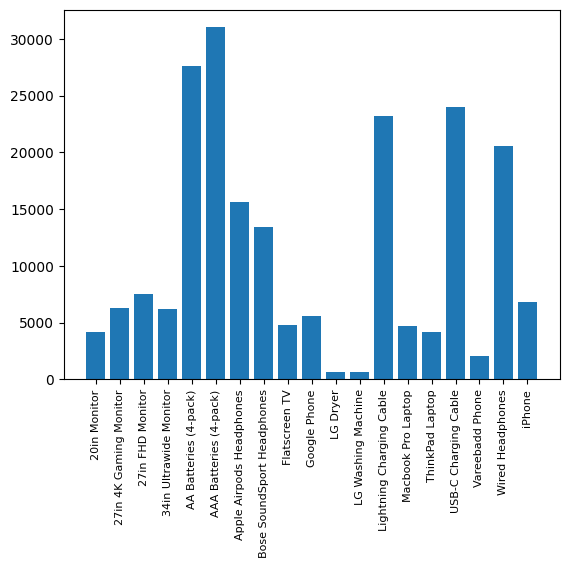

In [242]:
product_df = all_data.groupby(["Product"])
quantity_ordered_df = product_df.sum()["Quantity Ordered"]

keys = [pair[0] for pair, df in product_df]
plt.bar(keys, quantity_ordered_df)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()